In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import add
import seaborn as sns

In [2]:
def data_split_size(data,size):
      #on a given dataset return the splitted data=> train_data(based on size),validate_data(leftover)
      a_list=np.arange(data.shape[0])
      np.random.shuffle(a_list)
      alist=a_list[0:size]
      train_data=data[alist]
      d=np.arange(data.shape[0])
      leftover=np.delete(d,alist)
      validate_data=data[leftover]
      return train_data,validate_data

def calc_residual(truth,pred):
    delz= np.subtract(truth,pred)
    residual=np.divide(np.abs(delz),np.abs(truth))
    sum_residual= np.sum(residual)/truth.shape[0]
    print('residual is:',residual.shape,'sum residual is:',sum_residual)

    
def calc_deviation(truth,pred):
    delz= np.subtract(truth,pred)
    var= np.sum(np.square(delz))/truth.shape[0]
    print('variance is:',var)
    std= np.power(var,0.5)
    print('std is:',std)
    return std
    
def label_data(data,stest_pred):
      # create label for data(if predicted vale is >/< 5% of error then it labels it '1' or else it is '0')
      ones=np.ones(stest_pred.shape[0])
      zeros= np.zeros(stest_pred.shape[0])
      #print('test shape:',test_data[:,-1].shape,'zeros shape:',zeros.shape,'ones shape:',ones.shape,'stest shape',stest_pred.flatten().shape)
      result = np.where(np.absolute((data[:,-1]-stest_pred.flatten())) > (0.5*np.absolute(data[:,-1])),ones,zeros)
      data[:,-1]=result
      return data
    
def accuracy_estim(labeled_data):
    index_f = np.where(labeled_data[:,-1]==1)
    index_p = np.where(labeled_data[:,-1]==0)
    failed_gt= labeled_data[index_f[0]]
    passed_gt=labeled_data[index_p[0]]
    print('outlier is:',failed_gt.shape[0])
    return (passed_gt.shape[0]/(passed_gt.shape[0]+failed_gt.shape[0]))

In [24]:
data1= pd.read_csv("./vmc_cfd.csv", delimiter=",",header=None, dtype=np.float32,names = list('abcdntvD'))
data2= pd.read_csv("./vmc_cfd1.csv", delimiter=",",header=None, dtype=np.float32,names = list('abcdntvD'))
data3= pd.read_csv("./vmc_cfd2.csv", delimiter=",",header=None, dtype=np.float32,names = list('abcdntvDM'))
data4= pd.read_csv("./vmc_cfd3.csv", delimiter=",",header=None, dtype=np.float32,names = list('abcdntvDM'))

In [29]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
data4.describe()
data3=data3.drop('M', axis=1)
data4=data4.drop('M', axis=1)

(1328, 8)
(5, 8)
(1000, 9)
(1000, 9)


In [33]:
print(data1.shape)
print(data2.shape)
print(data3.shape)
print(data4.shape)
data1.describe()

(1328, 8)
(5, 8)
(1000, 8)
(1000, 8)


,a,b,c,d,n,t,v,D
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,251.939758,1003.139893,246.916367,123.830620,3.052063,25.744535,18409.082031,254.395493
std,118.607239,359.043488,115.785789,43.780533,1.155410,14.184070,9952.855469,478.402985
min,54.353878,1.385855,57.100487,50.083534,1.000545,1.067570,3374.653809,1.777798
25%,155.340328,747.480042,158.400639,84.741434,2.078053,13.493618,10023.655273,4.410953
50%,229.847404,1012.646759,226.563736,123.716248,3.071229,26.050035,16984.077148,6.020699
75%,331.455879,1275.712708,321.136917,161.082760,4.036349,37.993355,24600.830566,8.860093
max,596.781616,1836.012817,563.735535,199.814102,4.999616,49.920994,49438.265625,2200.000000


In [36]:
data_myring= pd.concat([data1, data2, data3, data4], ignore_index=True)
data_myring.describe()

,a,b,c,d,n,t,v,D
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,252.699600,993.427612,250.020691,124.982498,3.036466,25.681498,18559.796875,117.499481
std,119.281639,356.463928,116.215500,43.923500,1.161188,14.106682,9961.288086,363.595734
min,53.223019,1.385855,53.267483,50.038887,1.000545,1.007357,3308.497803,1.408730
25%,155.954361,737.140869,159.489670,86.162979,2.022639,13.519114,10162.018555,3.638376
50%,228.543808,998.997559,229.872864,125.918922,3.067092,25.492292,17172.173828,5.242270
75%,332.635925,1263.000366,327.556183,162.666595,4.032288,38.018417,24912.507812,7.061626
max,596.781616,1836.012817,592.481323,199.926880,4.999806,49.988354,49438.265625,2200.000000


In [37]:
data_myring['infeasible'] =  np.where((data_myring['D']>= 500), 1, 0)
data_myring.describe()

,a,b,c,d,n,t,v,D,infeasible
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,252.699600,993.427612,250.020691,124.982498,3.036466,25.681498,18559.796875,117.499481,0.093609
std,119.281639,356.463928,116.215500,43.923500,1.161188,14.106682,9961.288086,363.595734,0.291328
min,53.223019,1.385855,53.267483,50.038887,1.000545,1.007357,3308.497803,1.408730,0.000000
25%,155.954361,737.140869,159.489670,86.162979,2.022639,13.519114,10162.018555,3.638376,0.000000
50%,228.543808,998.997559,229.872864,125.918922,3.067092,25.492292,17172.173828,5.242270,0.000000
75%,332.635925,1263.000366,327.556183,162.666595,4.032288,38.018417,24912.507812,7.061626,0.000000
max,596.781616,1836.012817,592.481323,199.926880,4.999806,49.988354,49438.265625,2200.000000,1.000000


In [38]:
print(data_myring['infeasible'].sum())

312


In [39]:
data_myring.to_csv('data_myring_infeasible.csv', index=False)

In [42]:
feasible_data_myring=data_myring.loc[data_myring['infeasible'] == 0]
feasible_data_myring= feasible_data_myring[['a','b','c','d','n','t','D']]
feasible_data_myring.to_csv('feasible_data_myring.csv', index=False)

In [43]:
feasible_data_myring.describe()

,a,b,c,d,n,t,D
count,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000,3021.000000
mean,261.066559,980.266968,257.837341,129.389053,3.031066,25.754169,5.106362
std,118.924438,352.681580,115.334648,42.613651,1.161028,14.074292,2.115963
min,53.223019,1.385855,53.267483,50.038887,1.000545,1.007357,1.408730
25%,166.262802,727.165527,168.358643,93.775513,2.017541,13.660367,3.466284
50%,239.420074,982.860779,240.635208,131.399582,3.065560,25.492292,4.940198
75%,342.723663,1247.009399,337.002991,165.702927,4.023708,38.127720,6.483196
max,596.781616,1827.223511,592.481323,199.926880,4.999806,49.988354,21.172098


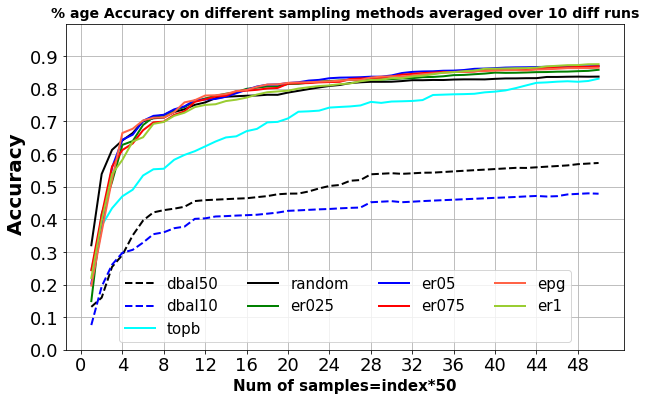

In [28]:
fig,ax=plt.subplots(figsize=(10,6))

plt.plot(index,data_d10,c='black',linestyle='dashed',label='dbal50',linewidth=2.0)
plt.plot(index,data_d50,c='blue',linestyle='dashed',label='dbal10',linewidth=2.0)
plt.plot(index,data_topb,c='cyan',label='topb',linewidth=2.0)
plt.plot(index,data_rand,c='black',label='random',linewidth=2.0)
plt.plot(index,data_er025,c='green',label='er025',linewidth=2.0)
plt.plot(index,data_er05,c='blue',label='er05',linewidth=2.0)
plt.plot(index,data_er075,c='red',label='er075',linewidth=2.0)
plt.plot(index,data_epg,c='tomato',label='epg',linewidth=2.0)
plt.plot(index,data_er1,c='yellowgreen',label='er1',linewidth=2.0)

#plt.legend(loc='best',fontsize=15)
plt.legend(loc="lower center", ncol=4,fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('% age Accuracy on different sampling methods averaged over 10 diff runs',fontsize=14, weight='bold')
#plt.hlines(max_uni,0,110,linestyles= 'dashed')
#plt.hlines(max_uni,6,25,linestyles= 'dashed')
#plt.vlines(6,0,max_uni,linestyles= 'dashed')
#plt.vlines(5.5,0,max_lhc,linestyles= 'dashed')
#plt.xticks(np.arange(0, 25+1, 1.0))
#plt.xlim(0,26)
#plt.ylim(0,85)
plt.xticks(np.arange(0, 52, 4))
plt.yticks(np.arange(0,1.0,0.1))
#plt.xlim(0,26)
plt.ylim(0,1.0)
plt.xlabel('Num of samples=index*50',fontsize=15,weight='bold')
plt.ylabel(' Accuracy',fontsize=20,weight='bold')
plt.grid()
plt.show()
fig.savefig('../fig/comparison_result1.png')

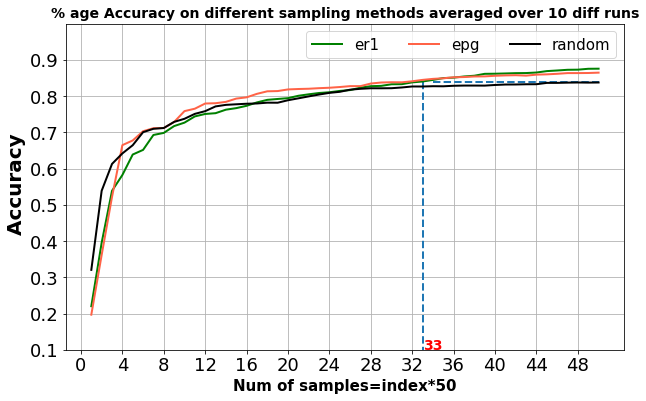

In [35]:
fig,ax=plt.subplots(figsize=(10,6))

plt.plot(index,data_er1,c='green',label='er1',linewidth=2.0)

plt.plot(index,data_epg,c='tomato',label='epg',linewidth=2.0)
plt.plot(index,data_rand,c='black',label='random',linewidth=2.0)



#plt.legend(loc='best',fontsize=15)
plt.legend(loc="best", ncol=4,fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('% age Accuracy on different sampling methods averaged over 10 diff runs',fontsize=14, weight='bold')
plt.hlines(max_uni,34,50,linestyles= 'dashed',linewidth=2.0)
plt.vlines(33,0,max_uni,linestyles= 'dashed',linewidth=2.0)
plt.text(33,0.1,'33',color='red',fontsize=14,weight='bold')

plt.xticks(np.arange(0, 52, 4))
plt.yticks(np.arange(0.1,1.0,0.1))
#plt.xlim(0,26)
plt.ylim(0.1,1.0)
plt.xlabel('Num of samples=index*50',fontsize=15,weight='bold')
plt.ylabel(' Accuracy',fontsize=20,weight='bold')
plt.grid()
plt.show()
fig.savefig('../fig/comparison_result2.png')

In [21]:
er=er025_data[:, 1::2]
er= er/275000
ep=epg_data[:,1::2]
ep= ep/275000
un= rand_data[:,1::2]
un= un/275000
print(er.shape)

(5, 25)


In [23]:
print(er025_data.shape)
#print(np.arange(5,dtype=int).reshape(1,-1).shape)
st_f=np.concatenate(((er),np.arange(1,26,dtype=int).reshape(1,-1)),axis=0)
st_df=pd.DataFrame(st_f.T).assign(Strategy='er025')
st_df=st_df.rename(columns={5: 'Trial'})
st_df=st_df.astype({"Trial": int})
 
lhc_f=np.concatenate(((ep),np.arange(1,26,dtype=int).reshape(1,-1)),axis=0)
lhc_df=pd.DataFrame(lhc_f.T).assign(Strategy='ep_greedy')
lhc_df=lhc_df.rename(columns={5: 'Trial'})
lhc_df=lhc_df.astype({"Trial": int})


uni_f=np.concatenate(((un),np.arange(1,26,dtype=int).reshape(1,-1)),axis=0)
uni_df=pd.DataFrame(uni_f.T).assign(Strategy='random')
uni_df=uni_df.rename(columns={5: 'Trial'})
uni_df=uni_df.astype({"Trial": int})

(5, 50)


In [24]:
cdf = pd.concat([st_df, lhc_df, uni_df])                                # CONCATENATE
mdf = pd.melt(cdf, id_vars=['Trial','Strategy'], var_name=['Number'])      # MELT
mdf.describe()

,Trial,value
count,375.000000,3.750000e+02
mean,13.000000,2.873941e-06
std,7.220737,3.401989e-07
min,1.000000,7.295853e-07
25%,7.000000,2.819099e-06
50%,13.000000,2.990472e-06
75%,19.000000,3.061742e-06
max,25.000000,3.171736e-06


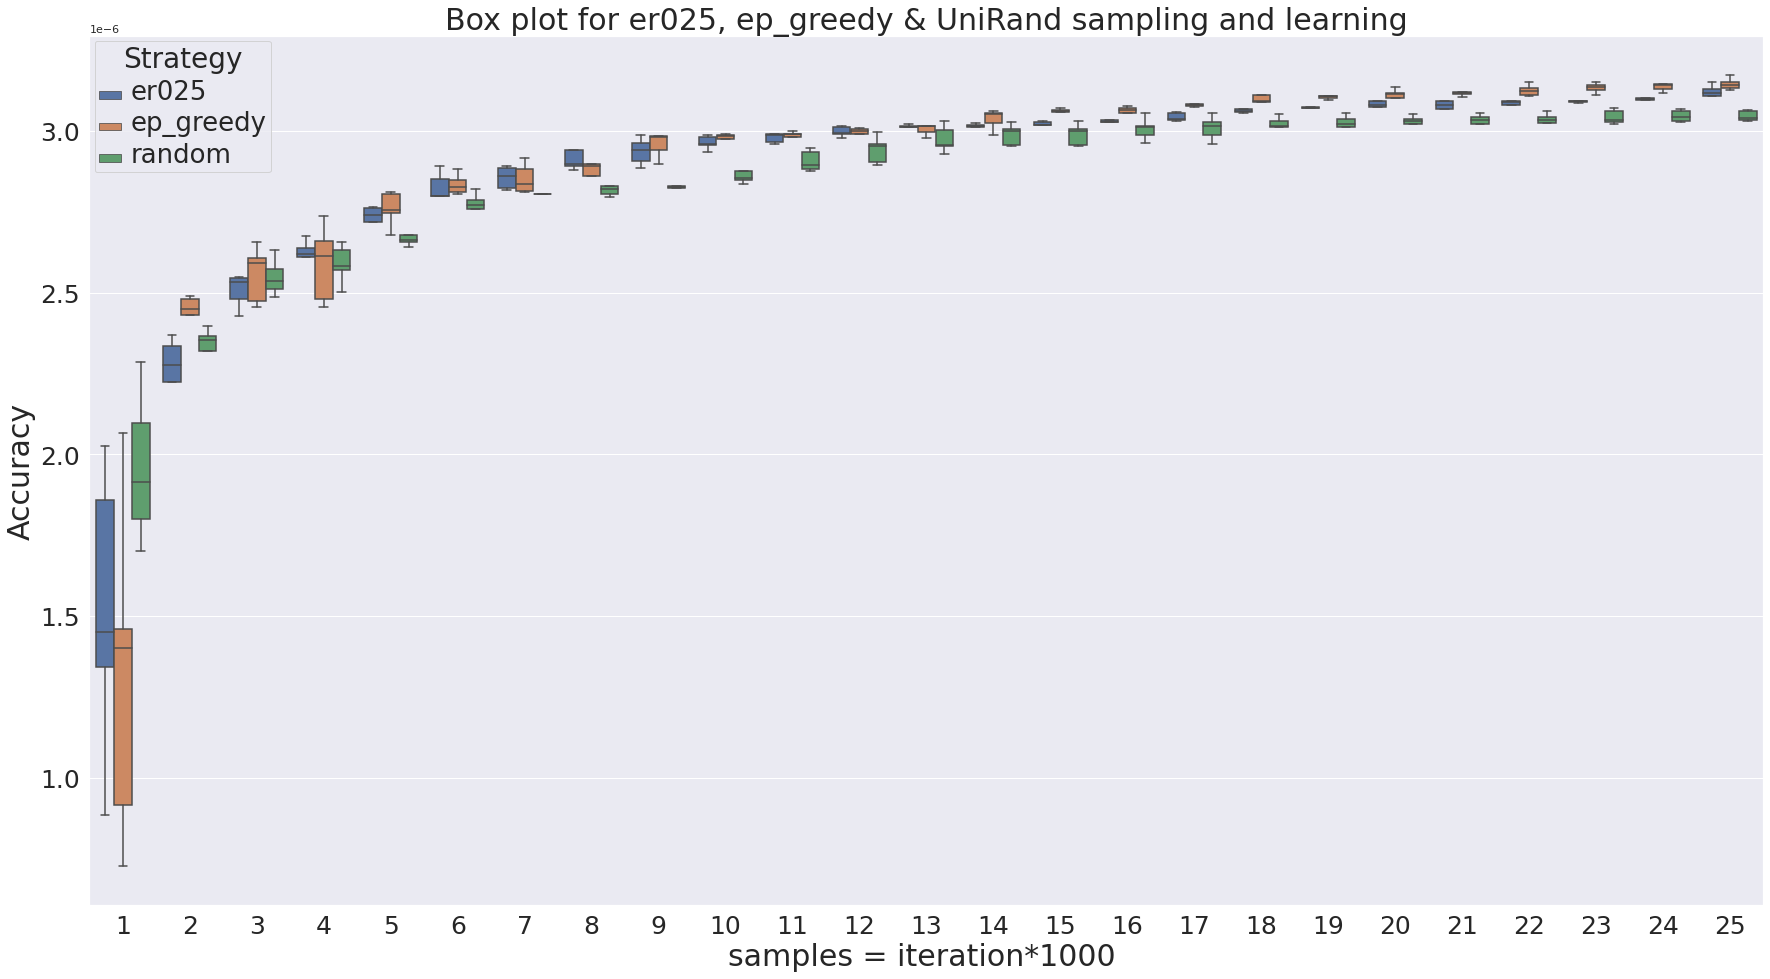

<Figure size 2160x1152 with 0 Axes>

In [25]:
import matplotlib.pylab as pot

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(30,16)})
#b = sns.boxplot(x="Trial", y="value", hue="Strategy", data=mdf)  # RUN PLOT  

b=sns.boxplot(x="Trial", y="value", hue="Strategy", data=mdf, showfliers = False)

b.set_title("Box plot for er025, ep_greedy & UniRand sampling and learning",fontsize=30)
b.set_xlabel("samples = iteration*1000 ",fontsize=30)
b.set_ylabel("Accuracy",fontsize=30)
b.tick_params(labelsize=25)
#sns.show()
plt.setp(b.get_legend().get_title(), fontsize='28') # for legend title
plt.setp(b.get_legend().get_texts(), fontsize='26') # for legend text
plt.show()
plt.savefig('../fig/op_boxplot.png')